El dataset de **startups** contiene variables como gastos en investigación y desarrollo (I+D), costos administrativos, gastos en marketing, ubicación geográfica y beneficios netos. Este tipo de datos es esencial para entender el rendimiento financiero y operativo de una startup, lo cual es crítico para la toma de decisiones tanto para los inversionistas como para la administración de la empresa.


a. Análisis Exploratorio de Datos (EDA) ¿Qué conclusiones puede sacar con respecto a las distribuciones de las variables numéricas y las relaciones entre ellas?


b. Modelo de Regresión Lineal para Predecir Beneficio Neto.


c. Cual es la intuicion detrás de la formula de la regresion resultante.


d. Cual es el error promedio? y el error elevado al cuadrado? ¿Que significa?


e. Analice del Sector de la Industria en el Beneficio Neto.


f. Cual es la relacion entre las series y el profit? Es importante hay alguna particularidad? (Hint)

# Análisis Exploratorio de Datos (EDA) 

In [340]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("emprendimientos.csv")

In [341]:
df.head()

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.20,136897.80,471784.10,New York,192261.83,Energy,227095.722346,289,Series A,608681.90
1,1,162597.70,151377.59,443898.53,California,191792.06,Tech,224711.757208,217,Series B,595276.12
2,2,153441.51,101145.55,407934.54,Florida,191050.39,Finance,222717.429984,407,Series C,509080.09
3,3,144372.41,118671.85,383199.62,New York,182901.99,Finance,214017.365199,383,Series A,501871.47
4,4,142107.34,91391.77,366168.42,Florida,166187.94,Finance,196476.965990,351,Series B,457560.19


In [342]:
df.dtypes

Unnamed: 0                 int64
RnD_Expenditure          float64
Admin_Costs              float64
Marketing_Expenditure    float64
Location                  object
Net_Profit               float64
Industry_Sector           object
Profit                   float64
Employee_Count             int64
Investment_Round          object
Operational_Cost         float64
dtype: object

In [343]:
df.isna().sum()

Unnamed: 0               0
RnD_Expenditure          0
Admin_Costs              0
Marketing_Expenditure    0
Location                 0
Net_Profit               0
Industry_Sector          0
Profit                   0
Employee_Count           0
Investment_Round         0
Operational_Cost         0
dtype: int64

In [344]:
df.describe().applymap(lambda x: round(x))

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Employee_Count,Operational_Cost
count,70,70,70,70,70,70,70,70
mean,34,73646,110300,212933,108075,120746,264,323233
std,20,46644,39611,129284,49145,55479,141,135323
min,0,0,2743,0,-21314,-14886,10,24436
25%,17,37579,96963,120540,78931,83429,145,219525
50%,34,73051,118609,212716,106661,119811,262,322938
75%,52,106301,136547,302424,140623,160098,393,413511
max,69,175623,182646,494431,192262,227096,497,614542


In [345]:
df.value_counts('Industry_Sector')

Industry_Sector
Tech          18
Healthcare    17
Finance       13
Energy        11
Retail        11
dtype: int64

Mayormente los emprendimientos se observan en el sector Tech 25%, Healthcare 24%, Finance 19%, Eenergy 16% y Retail 16%

In [346]:
df.value_counts('Location')

Location
California    25
New York      25
Florida       20
dtype: int64

En ubicaciones corresponde un 36% para California y 36% para NY y un 28% para Florida.

In [347]:
df.value_counts('Investment_Round')

Investment_Round
Seed        37
Series C    13
Series B     9
IPO          6
Series A     5
dtype: int64

La ronda de semilla es donde se recaudan fondos en las etapas iniciales. 
Las rondas A, B y C son etapas posteriores de financiamiento a medida que la empresa crece. 
La salida a bolsa (IPO) es cuando la empresa ofrece sus acciones al público.
El dataset posee un 52% de los emprendimientos en financiamiento semilla, seguido de un 18% de Series C en donde estan a un paso de cotizar en bolsa.

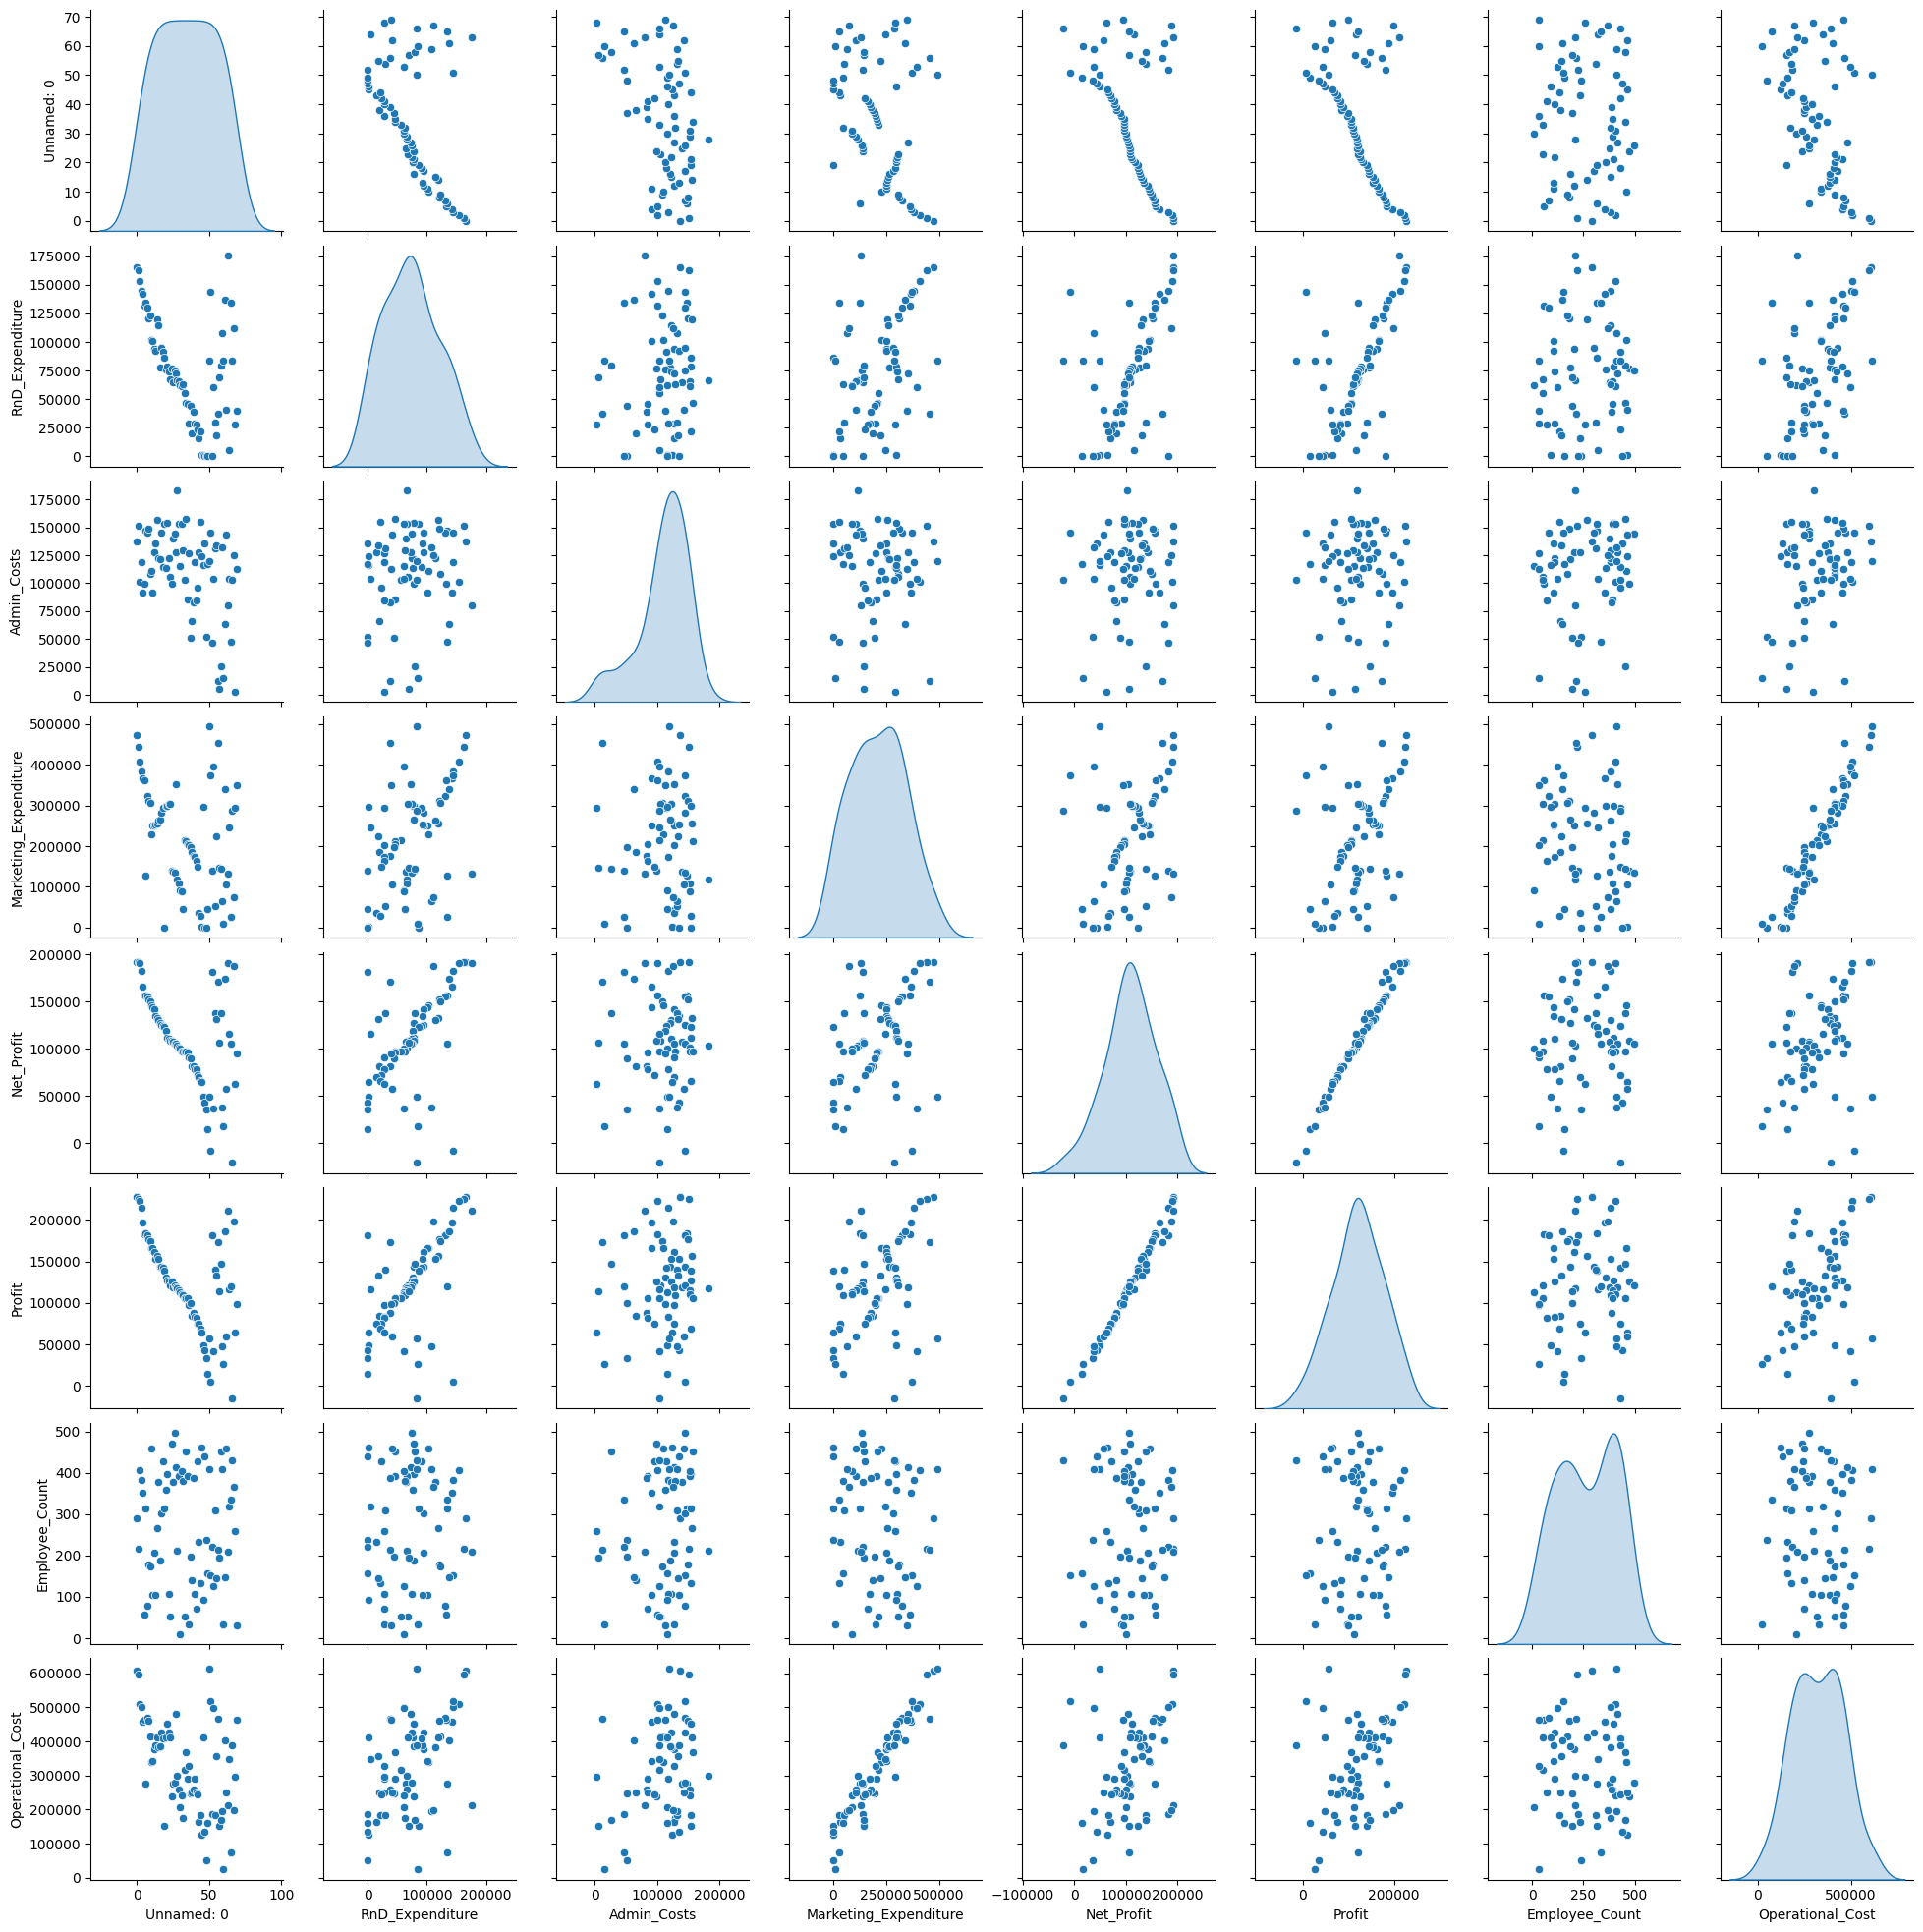

In [348]:
sns.pairplot(df, diag_kind='kde')
plt.show()

Se observa: para Net_Profit una mayor correlacion mas lineal con RnD_Expenditure que con el resto de las variables, lo que me da a pensar que los gastos o inversiones en Investigación y Desarrollo (I+D) afectan en mayor medida al beneficio neto.

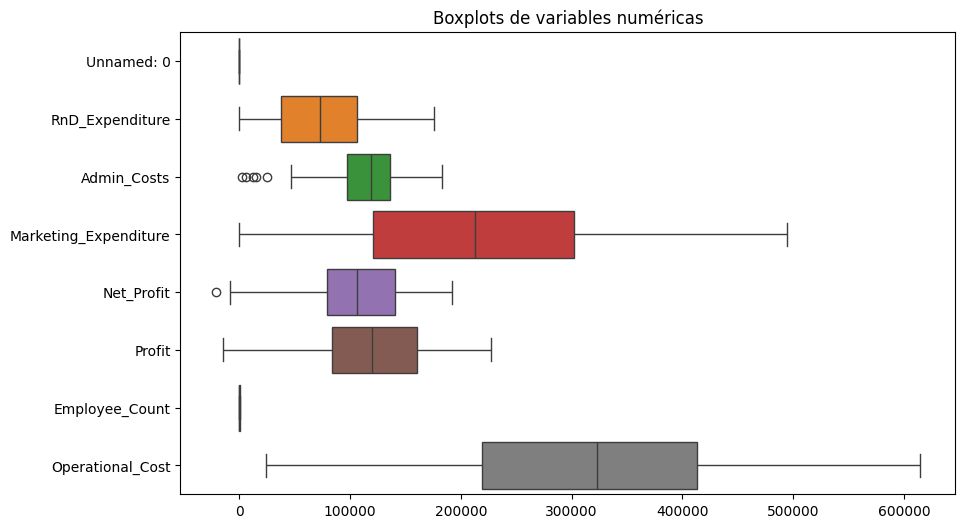

In [349]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns.columns], orient='h')
plt.title('Boxplots de variables numéricas')
plt.show()

Veo valores fuera de los bigotes del boxplot por lo cual los considero outliers y analizo:


In [350]:
len(df[df['Admin_Costs'] < 50000])

7

El 10% de la muestra representa un outlier para costos administrativos.

In [351]:
len(df[df['Net_Profit'] < -20000])

1

El 1,4% de la muestra representa un outlier para beneficio neto

# MODELO DE REGRESION LINEAL


In [352]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import re
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [353]:
features = ['RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure', 'Employee_Count', 'Operational_Cost']
formula = "Net_Profit ~ " + ' + '.join(features)
model = smf.ols(formula, data = df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Profit   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     6.985
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           9.67e-05
Time:                        15:56:26   Log-Likelihood:                -842.48
No. Observations:                  70   AIC:                             1695.
Df Residuals:                      65   BIC:                             1706.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.535e+04   1.94e+04      3.369      0.001    2.66e+04    1.04e+05
RnD_Expenditure           0.5156      0.124      4.149      0.000       0.267       0.764
Admin_Costs              -0.0497      0.088     -0.562      0.576      -0.226       0.127
Marketing_Expenditure     0.0473      0.052      0.909      0.367      -0.057       0.151
Employee_Count            3.4692     37.252      0.093      0.926     -70.929      77.868
Operational_Cost         -0.0023      0.047     -0.050      0.960      -0.096       0.091
==============================================================================
Omnibus:                       29.441   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.449
Skew:                          -1.322   Prob(JB):                     1.85e-16
Kurtosis:                       7.225   Cond. No.                     1.35e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.69e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Intuición detrás de la fórmula de la regresión resultante:**

En este caso:

Por cada punto que aumenta Costos en investigacion y desarrollo aumenta en 0.5156 mi Beneficio Neto y ademas el p-value es 0.

Por cada punto que aumenta Costos en administracion cae en 0.0497 mi beneficio neto y el p value es > 0,05 --> No lo considero relevante

Por cada punto que aumenta Costos en Marketing aumenta en 0.0473 mi Beneficio neto y el pvalues es > 0,05 --> No lo considero relevante

Por cada punto que aumenta Costos operacionales cae en 0.0023 mi Benefico Neto y el pvalue es > 0,05 --> No lo considero relevante

Por cada punto que aumenta los empleados cuementa en 3.4692 mi Beneficio Neto pero el pvalue al ser tan grande me rechaza la relevancia

**MAE & MSE**
Error Cuadrático Medio & Error Absoluto Medio

In [354]:
predictions = model.predict(df)

mse = mean_squared_error(df['Net_Profit'], predictions)
print(f"Error Cuadrático Medio (MSE): {mse}")

mae = mean_absolute_error(df['Net_Profit'], predictions)
print(f"Error Absoluto Medio (MAE): {mae}")


Error Cuadrático Medio (MSE): 1665028653.0206964
Error Absoluto Medio (MAE): 25052.215609129504


**Analice del Sector de la Industria en el Beneficio Neto.**

In [355]:
beneficio_promedio_por_sector = df.groupby('Industry_Sector')['Net_Profit'].mean()
beneficio_promedio_por_sector2 = beneficio_promedio_por_sector.idxmax()

beneficio_total_por_sector = df.groupby('Industry_Sector')['Net_Profit'].sum()
max_beneficio_sector = beneficio_total_por_sector.idxmax()

beneficio_promedio_por_sector2 = beneficio_promedio_por_sector.idxmax()


print("Beneficio neto promedio por sector:")
print(beneficio_promedio_por_sector)

print("\nBeneficio neto total por sector:")
print(beneficio_total_por_sector)

print(f"\nEl sector con el beneficio neto máximo es: {max_beneficio_sector}")
print(f"\nEl sector con el beneficio neto promedio mas alto por sector es: {beneficio_promedio_por_sector2}")

Beneficio neto promedio por sector:
Industry_Sector
Energy         95491.500844
Finance       129717.322667
Healthcare     90340.178050
Retail        103318.608851
Tech          119788.948734
Name: Net_Profit, dtype: float64

Beneficio neto total por sector:
Industry_Sector
Energy        1.050407e+06
Finance       1.686325e+06
Healthcare    1.535783e+06
Retail        1.136505e+06
Tech          2.156201e+06
Name: Net_Profit, dtype: float64

El sector con el beneficio neto máximo es: Tech

El sector con el beneficio neto promedio mas alto por sector es: Finance


Si bien el sector con beneficio neto maximo es el Tech (25% del dataset), el sector con el beneficio neto promedio mas alto es el Financiero (19%) y por lo tanto el mas rentable.

**¿Cual es la relacion entre las series y el profit?**

In [356]:
beneficio_promedio_por_serie = df.groupby('Investment_Round')['Net_Profit'].mean()
beneficio_promedio_por_serie2 = beneficio_promedio_por_sector.idxmax()

beneficio_total_por_serie = df.groupby('Investment_Round')['Net_Profit'].sum()
max_beneficio_serie = beneficio_total_por_serie.idxmax()

beneficio_promedio_por_serie2 = beneficio_promedio_por_serie.idxmax()


print("Beneficio neto promedio por serie de inversion:")
print(beneficio_promedio_por_serie)

print("\nBeneficio neto total por serie de inversion:")
print(beneficio_total_por_serie)

print(f"\nEl beneficio neto máximo por serie de inversion es: {max_beneficio_serie}")
print(f"\nEl beneficio neto promedio mas alto por serie de inversion es: {beneficio_promedio_por_serie2}")

Beneficio neto promedio por serie de inversion:
Investment_Round
IPO         102254.906667
Seed         97621.523929
Series A    127517.466000
Series B    132634.162222
Series C    116030.760769
Name: Net_Profit, dtype: float64

Beneficio neto total por serie de inversion:
Investment_Round
IPO         6.135294e+05
Seed        3.611996e+06
Series A    6.375873e+05
Series B    1.193707e+06
Series C    1.508400e+06
Name: Net_Profit, dtype: float64

El beneficio neto máximo por serie de inversion es: Seed

El beneficio neto promedio mas alto por serie de inversion es: Series B


Las empresas en etapas de semilla a menudo tienen un gran potencial de crecimiento al estar en una fase temprana de desarrollo de productos o servicios innovadores que tienen la capacidad de capturar una parte significativa del mercado, por lo que son atractivas para invertir y en este dataset puede ser la explicacion a por que son el 52% del mismo, representando el beneficio neto maximo por serie de inversion.

 Las empresas que han alcanzado la Serie B generalmente han superado las etapas iniciales y pueden estar más maduras en términos de productos, operaciones y estrategias. Esto puede traducirse en una mayor eficiencia y rentabilidad ya que han pasado por rondas de financiamiento anteriores, lo que implica que han demostrado atractivo para los inversores y encontrado maneras de escalar sus operaciones de manera más efectiva, permitiéndoles aumentar los ingresos sin aumentar proporcionalmente los costos. Por lo tanto tiene sentido que en este dataset representen el benefecio neto promedio mas alto de las series.